In [1]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 2 

In [5]:
# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

In [10]:
# Add custom layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(base_model.input, output)

In [11]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Data augmentation and loading
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)
train_generator = train_datagen.flow_from_directory('dataset', target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='training')
validation_generator = train_datagen.flow_from_directory('dataset', target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='validation')

Found 214 images belonging to 2 classes.


Found 36 images belonging to 2 classes.


In [13]:
#train the model
history = model.fit(train_generator, validation_data=validation_generator, epochs=EPOCHS)


C:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.4078 - loss: 17.6226 - val_accuracy: 0.5000 - val_loss: 3.0057
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5139 - loss: 2.2439 - val_accuracy: 0.5278 - val_loss: 1.1820
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5573 - loss: 1.3276 - val_accuracy: 0.5000 - val_loss: 2.5560
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6229 - loss: 1.3572 - val_accuracy: 0.5556 - val_loss: 2.0783
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5958 - loss: 1.2442 - val_accuracy: 0.5278 - val_loss: 1.4882
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6959 - loss: 0.7931 - val_accuracy: 0.5833 - val_loss: 1.5024
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7509 - loss: 0.6388 - val_accuracy: 0.6944 - val_loss: 1.3274
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7918 - loss: 0.5690 - val_accuracy: 0.6111 - val_loss: 1.5005
Epoch 9

In [14]:
# adding more 5 epochs
history = model.fit(train_generator, validation_data=validation_generator, epochs=5)


Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7912 - loss: 0.4461 - val_accuracy: 0.6389 - val_loss: 1.6598
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7895 - loss: 0.4852 - val_accuracy: 0.6111 - val_loss: 1.4882
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7625 - loss: 0.4491 - val_accuracy: 0.6389 - val_loss: 1.2816
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8795 - loss: 0.2780 - val_accuracy: 0.6389 - val_loss: 1.1847
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8899 - loss: 0.2361 - val_accuracy: 0.6389 - val_loss: 1.2981


In [15]:
test_loss, test_acc = model.evaluate(validation_generator)
print(f"Test Accuracy: {test_acc*100}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - accuracy: 0.6447 - loss: 1.3121
Test Accuracy: 63.88888955116272


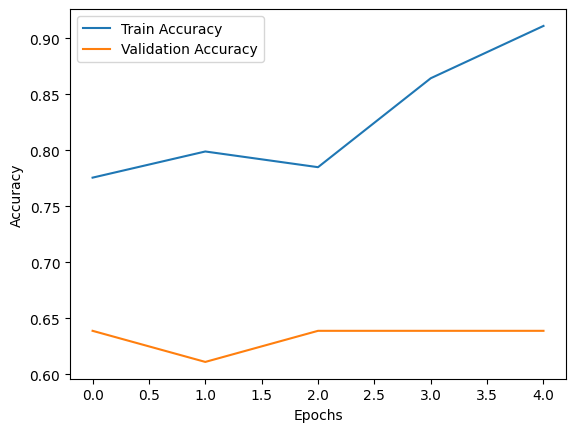

In [16]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()